In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import Data

In [2]:
df = pd.read_csv('diamonds_hw.csv')

In [3]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


Kolom-kolom dari dataset 'diamonds.csv' memiliki definisi sebagai berikut:
- price: price in US dollars ($326--$18,823)
- carat: weight of the diamond (0.2--5.01)
- cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- color: diamond colour, from J (worst) to D (best)
- clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- x: length in mm 
- y: width in mm 
- z: depth in mm 
- depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) 
- table: width of top of diamond relative to widest point


### Soal:

1. Terdapat beberapa kolom yang mengalami missing value. Tentukan metode terbaik untuk mengisi missing value pada kolom tersebut. Terapkan metode tersebut, dan berikan argumen Anda! (Tuliskan, "saya memilih metode __ untuk mengisi missing value pada kolom __ karena ___). 

2. Berdasarkan informasi terkait kolom `clarity`, lakukanlah encoding yang sesuai (ubahlah kolom `clarity` dari kategorikal menjadi numerik). 

2. Buatlah visualisasi boxplot untuk memeriksa distribusi pada kolom-kolom 'x', 'y', dan 'z'. Apakah ada data-data yang outlier? Jika ya, apa saja outlier yang muncul? Berapa banyak baris yang mengalami outlier?

In [4]:
df_copy = df.copy()

#### Nomor 1:

In [5]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53815 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [6]:
df_copy.isnull().sum()

carat      125
cut          0
color        0
clarity      0
depth        0
table        0
price        0
x            0
y            0
z            0
dtype: int64

In [7]:
# Persentase data yang utuh
((53940-125)/53940)*100

99.76826103077492

In [8]:
# Mengecek data yang missing values
df_copy[df_copy['carat'].isnull()]

,carat,cut,color,clarity,depth,table,price,x,y,z
194,NaN,Premium,E,SI1,61.2,57.0,2777,5.73,5.68,3.49
241,NaN,Fair,E,I1,64.5,58.0,2788,6.29,6.21,4.03
251,NaN,Good,G,SI2,61.0,61.0,2789,5.94,5.99,3.64
644,NaN,Very Good,F,SI2,63.2,58.0,2843,5.91,5.92,3.74
704,NaN,Fair,J,VS2,65.4,60.0,2854,6.04,6.00,3.94
...,...,...,...,...,...,...,...,...,...,...
50207,NaN,Ideal,F,VS1,60.3,57.0,2227,5.47,5.44,3.29
50559,NaN,Premium,H,SI1,62.7,59.0,2277,5.69,5.73,3.58
53019,NaN,Very Good,H,VS2,58.7,61.0,2599,5.96,5.99,3.51
53234,NaN,Ideal,F,SI1,61.9,57.0,2642,5.88,5.91,3.65


In [9]:
#df_carat = df_copy[['carat','cut','color','clarity','price']]
#df_carat  

In [10]:
carat1 = df_copy[df_copy['price']<=1000].carat.mean()
carat2 = df_copy[(df_copy['price']>1000) & (df_copy['price']<=3000)].carat.mean()
carat3 = df_copy[(df_copy['price']>3000) & (df_copy['price']<=5000)].carat.mean()
carat4 = df_copy[(df_copy['price']>5000) & (df_copy['price']<=7000)].carat.mean()
carat5 = df_copy[(df_copy['price']>7000) & (df_copy['price']<=10000)].carat.mean()
carat6 = df_copy[df_copy['price']>10000].carat.mean()

In [11]:
dict_carat = {
    'carat1':round(carat1, 2),
    'carat2':round(carat2, 2),
    'carat3':round(carat3, 2),
    'carat4':round(carat4, 2),
    'carat5':round(carat5, 2),
    'carat6':round(carat6, 2),    
}

dict_carat

{'carat1': 0.33,
 'carat2': 0.58,
 'carat3': 0.95,
 'carat4': 1.13,
 'carat5': 1.31,
 'carat6': 1.74}

In [12]:
kondisi1 = df_copy['price']<=1000
kondisi2 = (df_copy['price']>1000) & (df_copy['price']<=3000)
kondisi3 = (df_copy['price']>3000) & (df_copy['price']<=5000)
kondisi4 = (df_copy['price']>5000) & (df_copy['price']<=7000)
kondisi5 = (df_copy['price']>7000) & (df_copy['price']<=10000)
kondisi6 = df_copy['price']>10000

#kondisi7 = kondisi1 | kondisi2 | kondisi3 |kondisi4 | kondisi5 | kondisi6
df_copy.loc[kondisi1, 'carat'] = dict_carat['carat1']
df_copy.loc[kondisi2, 'carat'] = dict_carat['carat2']
df_copy.loc[kondisi3, 'carat'] = dict_carat['carat3']
df_copy.loc[kondisi4, 'carat'] = dict_carat['carat4']
df_copy.loc[kondisi5, 'carat'] = dict_carat['carat5']
df_copy.loc[kondisi6, 'carat'] = dict_carat['carat6']

In [13]:
df_copy.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

Saya memilih metode mean(rata-rata) untuk mengisi missing value pada kolom 'carat' karena variasi data pada kolom 'carat' yang banyak dan karena karat menjadi salah satu variabel penentu harga diamond, maka saya membuat beberapa kondisi untuk menghasilkan beberapa nilai rata-rata, yang kemudian digunakan untuk menggantikan missing value pada kolom 'carat'.

#### Nomor 2:

In [14]:
# clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
df_copy['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [15]:
clarity_dict = {
    'I1' : 1,
    'SI2' : 2,
    'SI1' : 3,
    'VS2' : 4,
    'VS1' : 5,
    'VVS2' : 6,
    'VVS1' : 7,
    'IF' : 8
}
clarity_dict

{'I1': 1,
 'SI2': 2,
 'SI1': 3,
 'VS2': 4,
 'VS1': 5,
 'VVS2': 6,
 'VVS1': 7,
 'IF': 8}

In [16]:
df_copy['clarity_2'] = df_copy['clarity'].map(clarity_dict)
df_copy

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_2
0,0.33,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2
1,0.33,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3
2,0.33,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,5
3,0.33,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4
4,0.33,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.58,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,3
53936,0.58,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,3
53937,0.58,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,3
53938,0.58,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,2


#### Nomor 3:

In [17]:
import seaborn as sns

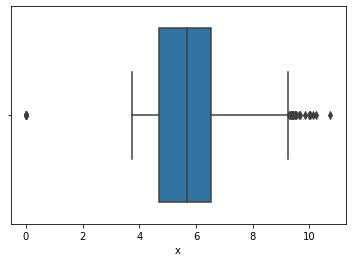

In [18]:
sns.boxplot(x=df_copy['x'])
plt.show()

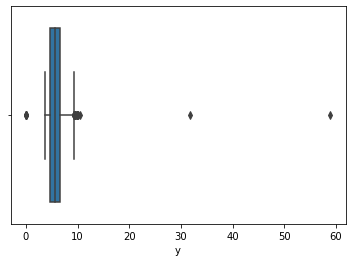

In [19]:
sns.boxplot(x=df_copy['y'])
plt.show()

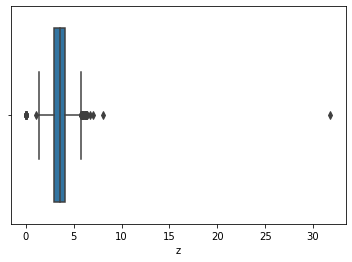

In [20]:
sns.boxplot(x=df_copy['z'])
plt.show()

In [32]:
q3 = df_copy['x'].quantile(0.75)
q1 = df_copy['x'].quantile(0.25)
iqr = q3-q1

batas_bawah = q1 - 1.5 * iqr
batas_atas = q3 + 1.5 * iqr

outlier_x = df_copy[ ( df_copy['x'] < batas_bawah ) | (df_copy['x'] > batas_atas)]

print('Banyak outlier pada kolom x adalah sebanyak',len(outlier_x['x']))
outlier_x

Banyak outlier pada kolom x adalah sebanyak 32


,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_2
11182,0.95,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.00,2
11963,1.13,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.00,4
15951,1.13,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.00,5
22741,1.74,Fair,H,I1,56.1,62.0,10761,9.54,9.38,5.31,1
22831,1.74,Good,I,I1,57.0,64.0,10863,9.38,9.31,5.33,1
23644,1.74,Fair,H,I1,67.1,53.0,11668,9.53,9.48,6.38,1
24131,1.74,Premium,H,I1,62.1,58.0,12300,9.44,9.40,5.85,1
24297,1.74,Ideal,I,I1,62.6,55.0,12545,9.49,9.42,5.92,1
24328,1.74,Ideal,H,I1,62.8,57.0,12587,9.65,9.59,6.03,1
24520,1.74,Ideal,G,VS2,62.2,54.0,12800,0.00,0.00,0.00,4


In [31]:
q3 = df_copy['y'].quantile(0.75)
q1 = df_copy['y'].quantile(0.25)
iqr = q3-q1

batas_bawah = q1 - 1.5 * iqr
batas_atas = q3 + 1.5 * iqr

outlier_y = df_copy[ ( df_copy['y'] < batas_bawah ) | (df_copy['y'] > batas_atas)]

print('Banyak outlier pada kolom y adalah sebanyak',len(outlier_y['y']))
outlier_y

Banyak outlier pada kolom y adalah sebanyak 29


,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_2
11963,1.13,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.00,4
15951,1.13,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.00,5
22741,1.74,Fair,H,I1,56.1,62.0,10761,9.54,9.38,5.31,1
22831,1.74,Good,I,I1,57.0,64.0,10863,9.38,9.31,5.33,1
23644,1.74,Fair,H,I1,67.1,53.0,11668,9.53,9.48,6.38,1
24067,1.74,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,8.06,2
24131,1.74,Premium,H,I1,62.1,58.0,12300,9.44,9.40,5.85,1
24297,1.74,Ideal,I,I1,62.6,55.0,12545,9.49,9.42,5.92,1
24328,1.74,Ideal,H,I1,62.8,57.0,12587,9.65,9.59,6.03,1
24520,1.74,Ideal,G,VS2,62.2,54.0,12800,0.00,0.00,0.00,4


In [30]:
q3 = df_copy['z'].quantile(0.75)
q1 = df_copy['z'].quantile(0.25)
iqr = q3-q1

batas_bawah = q1 - 1.5 * iqr
batas_atas = q3 + 1.5 * iqr

outlier_z = df_copy[ ( df_copy['z'] < batas_bawah ) | (df_copy['z'] > batas_atas)]

print('Banyak outlier pada kolom z adalah sebanyak',len(outlier_z['z']))
outlier_z

Banyak outlier pada kolom z adalah sebanyak 49


,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_2
2207,0.95,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.00,2
2314,0.95,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.00,1
4791,0.95,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.00,2
5471,0.95,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.00,2
10167,0.95,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.00,1
11182,0.95,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.00,2
11963,1.13,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.00,4
13601,1.13,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.00,4
14635,1.13,Ideal,F,SI1,60.6,57.0,5909,6.62,6.67,1.07,3
15951,1.13,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.00,5
